# Introducing Random Forest
We'll be learning about random forests in this module, which as you may guess from the name, is a model built with multiple trees. The goal of random forests is to take the advantages of decision trees while mitigating the variance issues.

In [1]:
from sklearn.ensemble import RandomForestClassifier as RF

# Bootstrapping
A bootstrapped sample is a random sample of datapoints where we randomly select with replacement datapoints from our original dataset to create a dataset of the same size.This means that in a bootstrapped sample, some datapoints from the original dataset will appear multiple times and some will not appear at all.

We use bootstrapping to mimic creating multiple samples. For example if we have four datapoints A,B,C,D these could be three resamples:

A,A,B,C

B,B,B,D

A,A,C,C

# Decorrelating the Trees
A standard choice for the number of features to consider at each split is the square root of the number of features. So if we have 9 features, we will consider 3 of them at each node (randomly chosen).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split as split

df = pd.read_csv('../titanic.csv')
df['Male'] = df['Sex'] == 'male'
X = df[['Pclass','Male','Age','Siblings/Spouses','Parents/Children','Fare']].values
y = df['Survived'].values
X_train, X_test, y_train, y_test = split(X, y, train_size=0.8)

In [51]:
rfmodel = RF()
rfmodel.fit(X_train,y_train)

RandomForestClassifier()

In [4]:
print(rfmodel.score(X_test,y_test))

0.7865168539325843


In [32]:
from sklearn.tree import DecisionTreeClassifier as DT
dtmodel = DT(max_depth=5,max_leaf_nodes=15,min_samples_leaf=10)
#dtmodel = DT()

In [33]:
dtmodel.fit(X_train,y_train)
print(dtmodel.score(X_test,y_test))

0.7


In [34]:
param_grid = {
    'max_features' : [1,2,3,4,5],
    'n_estimators' : [10,25,50,75,100]
}

In [28]:
from sklearn.model_selection import GridSearchCV

model = RF()
gs = GridSearchCV(model,param_grid,scoring='accuracy',cv=5)
gs.fit(X,y)
print('Best params: ',gs.best_params_)

Best params:  {'max_features': 2, 'n_estimators': 50}


In [36]:
rfmodel_enhanced = RF(n_estimators=25,max_features=3)
rfmodel_enhanced.fit(X_train,y_train)
print(rfmodel_enhanced.score(X_test,y_test))

0.75


# Elbow graph
With a parameter like the number of trees in a random forest, increasing the number of trees will never hurt performance. Increasing the number trees will increase performance until a point where it levels out.

In [42]:
n_estimators = list(range(25,101))
param_grid = {
    'n_estimators' : n_estimators
}
new_model = RF()
gs = GridSearchCV(new_model,param_grid,scoring='accuracy',cv=5)
gs.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [25, 26, 27, 28, 29, 30, 31, 32, 33,
                                          34, 35, 36, 37, 38, 39, 40, 41, 42,
                                          43, 44, 45, 46, 47, 48, 49, 50, 51,
                                          52, 53, 54, ...]},
             scoring='accuracy')

In [43]:
scores = gs.cv_results_['mean_test_score']

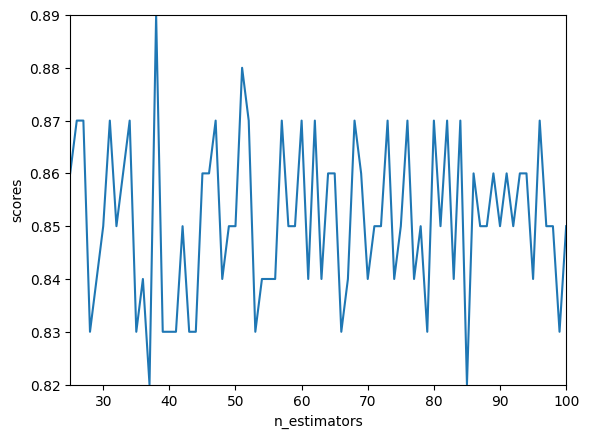

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(n_estimators,scores)
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.xlim(25,100)
plt.ylim(np.min(scores), np.max(scores))
plt.show()

In [15]:
features = ['Pclass','Male','Age','Siblings/Spouses','Parents/Children','Fare']
important_features = pd.Series(rfmodel_enhanced.feature_importances_,features).sort_values(ascending=False)
print(important_features)

Male                0.302247
Age                 0.270912
Fare                0.247716
Pclass              0.100009
Siblings/Spouses    0.058955
Parents/Children    0.020161
dtype: float64


# Advantages of RF
Probably the biggest advantage of Random Forests is that they generally perform well without any tuning. They will also perform decently well on almost every dataset.

In [50]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression as LgR

X, y = make_circles(noise=0.5, factor=0.5)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LgR(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    rf = RF(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

LR accuracy: 0.45
RF accuracy: 0.55
